# **TP2 K Plus Proches Voisins**

# 1 KNN pour la classification

### Tâche 1 : Analyse des données

In [12]:
import pandas as pd

In [13]:
# Charger le fichier
df = pd.read_csv('../diabetes.csv')

# 1. Dimensions du DataFrame
print("Dimensions du DataFrame :", df.shape)

# 2. Résumé des données
print("\nRésumé des données :")
df.info()

# 3. Statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())

# 4. Distribution des classes
print("\nDistribution des classes :")
print(df['Outcome'].value_counts())

# 5. Nombre de caractéristiques descriptives
print("\nNombre de caractéristiques descriptives et leurs types :")
print(df.dtypes)

Dimensions du DataFrame : (767, 7)

Résumé des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   767 non-null    int64  
 1   BloodPressure             767 non-null    int64  
 2   Insulin                   767 non-null    int64  
 3   BMI                       767 non-null    float64
 4   DiabetesPedigreeFunction  767 non-null    float64
 5   Age                       767 non-null    int64  
 6   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB

Statistiques descriptives :
          Glucose  BloodPressure     Insulin         BMI  \
count  767.000000     767.000000  767.000000  767.000000   
mean   120.930900      69.104302   79.903520   31.994654   
std     31.977581      19.368410  115.283105    7.889095   
min      0.000000       

### Interprétation des résultats

###### Combien de classes sont présentes dans la base de données ?
    La colonne Outcome représente les classes :
    -> 0 pour les personnes non diabétiques.
    -> 1 pour les personnes diabétiques.
    Il y a 2 classes distinctes dans la base de données.

###### Combien de caractéristiques descriptives et de quels types ?
    Le DataFrame contient 7 colonnes, dont 6 colonnes sont des caractéristiques descriptives utilisées pour prédire le Outcome (la classe cible).

###### Combien d’exemples dans la base de données ? Et par classe ?
    -> Le DataFrame contient 767 exemples au total.
    -> Distribution par classe :
       - 499 exemples pour la classe 0 (non diabétique).
       - 268 exemples pour la classe 1 (diabétique).

### Tâche 2 : Préparation des données

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Séparer les caractéristiques (X) et la classe cible (y)
X = df.drop('Outcome', axis=1)  # Toutes les colonnes sauf Outcome
y = df['Outcome']  # Colonne Outcome

In [16]:
# Découpage des données
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, random_state=42, stratify=y
)
#La répartition des classes doit rester similaire dans les deux ensembles grâce à stratify=y.

In [17]:
print("Taille de train data :", X_train.shape[0])
print("Taille de test data :", X_test.shape[0])

# Vérification des proportions des classes
print("Distribution des classes dans l'ensemble d'apprentissage :")
print(y_train.value_counts(normalize=True))
print("\nDistribution des classes dans l'ensemble de test :")
print(y_test.value_counts(normalize=True))

Taille de train data : 511
Taille de test data : 256
Distribution des classes dans l'ensemble d'apprentissage :
Outcome
0    0.649706
1    0.350294
Name: proportion, dtype: float64

Distribution des classes dans l'ensemble de test :
Outcome
0    0.652344
1    0.347656
Name: proportion, dtype: float64


### Tâche 3 : Apprentissage et validation du modèle

In [ ]:
# Importation des bibliothèques nécessaires
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore

In [20]:
# Création et entraînement du modèle KNN

# Créer le modèle avec n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

# Entraîner le modèle
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
# Évaluation des performances

# Précision sur l'ensemble d'apprentissage
train_score = knn.score(X_train, y_train)

# Précision sur l'ensemble de test
test_score = knn.score(X_test, y_test)

# Afficher les scores
print(f"Model (k=1): [train: {train_score:.2f}, test: {test_score:.2f}]")

Model (k=1): [train: 1.00, test: 0.69]


In [ ]:
# Calcul de la matrice de confusion

# Prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print("\nMatrice de confusion :")
print(conf_matrix)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non diabétique', 'Diabétique'], yticklabels=['Non diabétique', 'Diabétique'])
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion")
plt.show()


Matrice de confusion :
[[125  42]
 [ 38  51]]


### Tâche 4 :
##### Analysez la matrice de confusion proposée par les prédictions du modèle sur la base de test. Que pouvez-vous observer ?
    -> La matrice de confusion montre les performances du modèle sur l’ensemble de test en distinguant les prédictions correctes (vrais positifs et vrais négatifs) des erreurs (faux positifs et faux négatifs). On peut observer que le modèle a tendance à mieux prédire la classe majoritaire (non diabétique) que la classe minoritaire (diabétique), probablement en raison du déséquilibre des données. Les erreurs critiques sont les faux négatifs, car elles représentent des cas de diabète non détectés, ce qui peut avoir des conséquences graves.

### Tâche 5 :
###### Testez plusieurs valeurs de paramètre n_neighbors et sélectionnez celle qui vous semble vous procurer le modèle le plus performant.


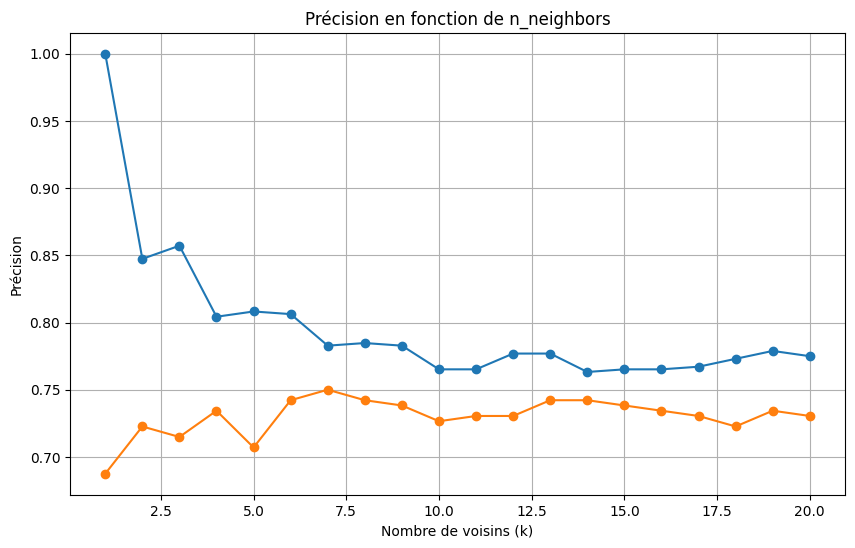

Le meilleur k est : 7 avec une précision de test de 0.75


In [24]:
# Import nécessaire
import matplotlib.pyplot as plt

# Liste pour stocker les scores
train_scores = []
test_scores = []

# Tester n_neighbors dans la plage [1, 20]
for k in range(1, 21):
    # Créer et entraîner le modèle
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Stocker les scores d'apprentissage et de test
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_scores, label="Score d'apprentissage", marker='o')
plt.plot(range(1, 21), test_scores, label="Score de test", marker='o')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Précision")
plt.title("Précision en fonction de n_neighbors")
plt.grid()
plt.show()

# Identifier la meilleure valeur de k
best_k = test_scores.index(max(test_scores)) + 1
print(f"Le meilleur k est : {best_k} avec une précision de test de {max(test_scores):.2f}")

In [25]:
# Import nécessaire
import matplotlib.pyplot as plt

k = 1 : Précision = 0.6875
k = 2 : Précision = 0.7227
k = 3 : Précision = 0.7148
k = 4 : Précision = 0.7344
k = 5 : Précision = 0.7070
k = 6 : Précision = 0.7422
k = 7 : Précision = 0.7500
k = 8 : Précision = 0.7422
k = 9 : Précision = 0.7383
k = 10 : Précision = 0.7266
k = 11 : Précision = 0.7305
k = 12 : Précision = 0.7305
k = 13 : Précision = 0.7422
k = 14 : Précision = 0.7422
k = 15 : Précision = 0.7383
k = 16 : Précision = 0.7344
k = 17 : Précision = 0.7305
k = 18 : Précision = 0.7227
k = 19 : Précision = 0.7344
k = 20 : Précision = 0.7305


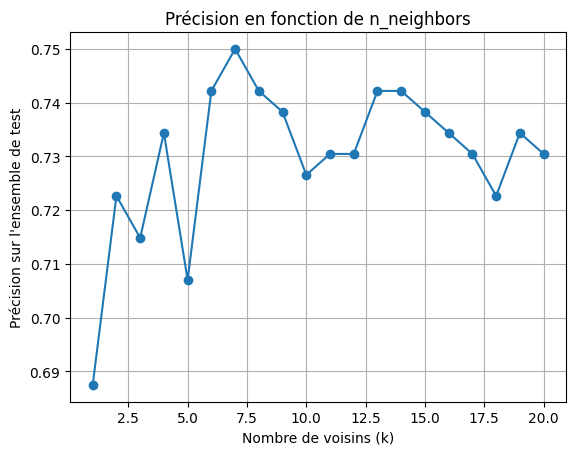

Le meilleur k est : 7 avec une précision de test de 0.75


In [26]:
# Initialiser les scores
scores = []

# Tester n_neighbors dans la plage [1, 20]
for k in range(1, 21):
    # Créer et entraîner le modèle
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Stocker les scores de test
    score = knn.score(X_test, y_test)
    scores.append((k, score))  # Stocker k et son score

# Afficher tous les scores
for k, score in scores:
    print(f"k = {k} : Précision = {score:.4f}")

# Tracer les résultats
plt.plot([k for k, _ in scores], [score for _, score in scores], marker='o')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Précision sur l'ensemble de test")
plt.title("Précision en fonction de n_neighbors")
plt.grid()
plt.show()

# Afficher le meilleur k
best_k, best_score = max(scores, key=lambda x: x[1])
print(f"Le meilleur k est : {best_k} avec une précision de test de {best_score:.2f}")

# 2 KNN pour la régression